In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import signal

In [2]:
import scipy.signal as sg

In [3]:
import pandas as pd

### info

P300 dataset for eight healthy subjects.

This dataset was produced using the standard 6x6 Donchin and Farewell P300 Speller Matrix, with an ISI (inter-stimulus interval) of 0.125 ms.

There are 7 words with 5 letters each.

There are 10 (**actually, 20**) intensification sequences per letter.

The original procedure used 3 words for training, and tried to decode the remaining 4 words for testing.

In [7]:
pwd

'C:\\Users\\user\\Desktop\\Neurointerfaces lab\\BCI\\Decoding-P300EEG2Word\\notebooks'

In [8]:
datapath = 'epochs/epochs/epochs_S02.mat'

data = loadmat(datapath)
display(list(data.keys()))
display(data)

['__header__',
 '__version__',
 '__globals__',
 'tar_eeg',
 'tar_letters',
 'nontar_eeg',
 'nontar_letters']

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Tue Oct 14 22:20:59 2025',
 '__version__': '1.0',
 '__globals__': [],
 'tar_eeg': array([[[ 4.55525827e+00, -1.79370677e+00, -2.08624725e+01, ...,
           2.72977924e+00,  4.44703150e+00,  4.87109280e+00],
         [ 5.69970655e+00, -8.19980681e-01, -1.62557144e+01, ...,
           2.43995094e+00,  5.00222445e+00,  5.29441357e+00],
         [ 7.48123789e+00,  8.38312685e-01, -1.17212696e+01, ...,
           3.63775420e+00,  5.99392223e+00,  5.70813274e+00],
         ...,
         [ 5.71119881e+00,  1.69355278e+01,  6.89392700e+01, ...,
           1.03290548e+01,  1.51261272e+01,  1.14754429e+01],
         [ 4.43742132e+00,  1.58935623e+01,  6.48086929e+01, ...,
           9.28532600e+00,  1.50954370e+01,  1.01193695e+01],
         [ 2.63391423e+00,  1.40469980e+01,  6.02153397e+01, ...,
           8.49011326e+00,  1.48649569e+01,  8.43422985e+00]],
 
        [[-1.06253605e+01, -9.32321358e+00, -4.02796364e+01, ...,
     

# Data analysis

## Fs, Channels

In [5]:
fs = data['Fs'][0][0]

ch_names_raw = data['channelNames']
ch_names = [str(x[0]) if isinstance(x, (list, np.ndarray)) else str(x) for x in np.atleast_1d(ch_names_raw).ravel()]
print('Fs:', fs)
print('channels:', ch_names)

Fs: 250
channels: ['FZ', 'CZ', 'P3', 'PZ', 'P4', 'PO7', 'PO8', 'OZ']


## EEG

In [6]:
eeg = data['samples']
print(eeg.shape)

(355904, 8)


In [7]:
eeg2 = data['data'][0][0][0]
print(eeg2.shape)

(355904, 8)


In [8]:
sum(eeg - eeg2)

array([0., 0., 0., 0., 0., 0., 0., 0.])

`data['samples']` and `data['data'][0][0][0]` are the same

[  0.         1.953125   3.90625    5.859375   7.8125     9.765625
  11.71875   13.671875  15.625     17.578125  19.53125   21.484375
  23.4375    25.390625  27.34375   29.296875  31.25      33.203125
  35.15625   37.109375  39.0625    41.015625  42.96875   44.921875
  46.875     48.828125  50.78125   52.734375  54.6875    56.640625
  58.59375   60.546875  62.5       64.453125  66.40625   68.359375
  70.3125    72.265625  74.21875   76.171875  78.125     80.078125
  82.03125   83.984375  85.9375    87.890625  89.84375   91.796875
  93.75      95.703125  97.65625   99.609375 101.5625   103.515625
 105.46875  107.421875 109.375    111.328125 113.28125  115.234375
 117.1875   119.140625 121.09375  123.046875 125.      ]
3177
(65, 8, 3177)


Text(0.5, 1.0, 'EEG raw')

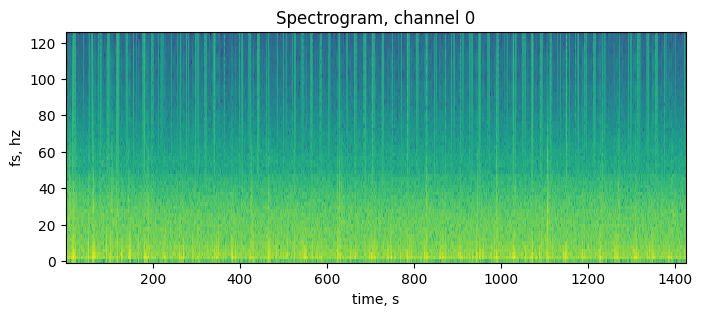

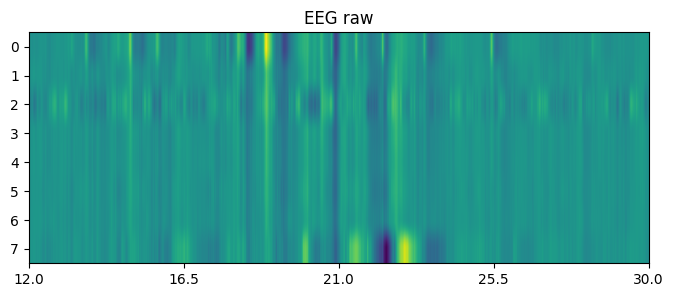

In [9]:
f,t,sxx = sg.spectrogram(eeg, fs=fs, nperseg=128, axis=0)

print(f)
print(len(t))
print(sxx.shape)

plt.figure(figsize=(8,3))
ch = 0
plt.pcolormesh(t,f,np.log(sxx[:,ch,:]))
plt.title(f'Spectrogram, channel {ch}')
plt.xlabel('time, s')
plt.ylabel('fs, hz')


t1 = 3000
t2 = 7500

plt.figure(figsize=(8,3))
plt.imshow(eeg[t1:t2,:].T, aspect='auto')
plt.xticks(np.linspace(0,len(eeg[t1:t2,:]), 5), np.linspace((t1/fs),t2/fs, 5))
plt.title(f'EEG raw')


In [10]:
df = pd.DataFrame(data=eeg, columns=list(np.arange(8)))
display(df.head())
print(len(df))
df.describe()

,0,1,2,3,4,5,6,7
0,94.880013,37.839928,39.193558,39.453213,37.716793,20.863768,41.853127,101.785683
1,92.453186,38.578701,38.048622,42.040066,39.609169,26.063082,43.977551,105.554031
2,88.607788,37.398121,37.549126,42.440849,38.880703,33.059769,41.782360,106.718643
3,82.829956,33.526520,34.847694,38.840103,33.974709,35.638435,33.428383,98.200478
4,75.152245,27.341883,28.021280,31.251160,25.404186,30.088678,20.653090,79.101891


355904


,0,1,2,3,4,5,6,7
count,355904.000000,355904.000000,355904.000000,355904.000000,355904.000000,355904.000000,355904.000000,355904.000000
mean,-0.006572,-0.004140,-0.009815,-0.003367,-0.003606,-0.003021,-0.003875,-0.018716
std,18.656863,10.401352,25.824693,9.664393,9.615004,10.527084,8.326859,12.127735
min,-191.862686,-105.950188,-140.119965,-97.330376,-86.949776,-90.023827,-76.943031,-272.090790
25%,-5.695440,-6.264042,-14.435213,-6.001499,-6.059275,-6.702886,-5.271014,-5.936598
50%,0.040176,-0.121825,0.004567,-0.088219,-0.101937,-0.091456,-0.080058,-0.195645
75%,5.811879,6.148988,14.151719,5.857667,5.887627,6.563708,5.130156,5.663573
max,252.401154,117.642776,178.854675,94.864525,86.890755,80.332535,64.487129,294.014557


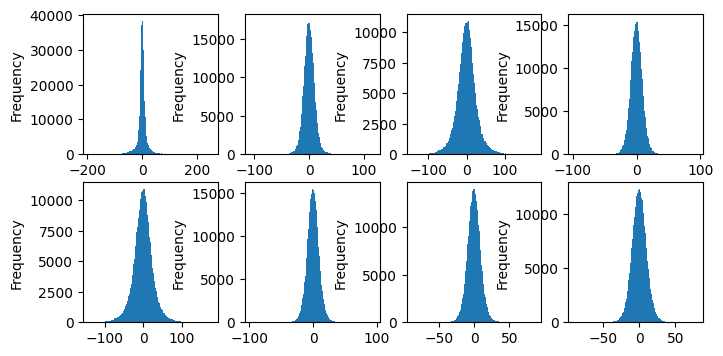

In [11]:
plt.figure(figsize=(8,4))
for i in range(2):
    for j in range(4):
        plt.subplot2grid((2,4), (i,j))
        df[i*2+j].plot.hist(bins=200)

## Marks

In [12]:
# Targets
targets = list(str(data['Word'])[2:-2])
print(targets)

['T', 'O', 'K', 'E', 'N', 'M', 'I', 'R', 'A', 'R', 'J', 'U', 'J', 'U', 'Y', 'M', 'A', 'N', 'S', 'O', 'C', 'I', 'N', 'C', 'O', 'J', 'U', 'E', 'G', 'O', 'Q', 'U', 'E', 'S', 'O']


In [13]:
display(data['data'][0][0])

(array([[ 94.88001251,  37.83992767,  39.19355774, ...,  20.86376762,
         41.85312653, 101.78568268],
       [ 92.45318604,  38.57870102,  38.04862213, ...,  26.06308174,
         43.97755051, 105.55403137],
       [ 88.60778809,  37.39812088,  37.54912567, ...,  33.05976868,
         41.78236008, 106.71864319],
       ...,
       [  9.76599503,  14.46594811,  18.89740753, ...,  10.45339108,
         14.97983265,  16.21001053],
       [  6.87027025,  10.89170361,  18.18867302, ...,   9.48830795,
         12.29760075,  13.69259453],
       [  3.22462034,   5.9075551 ,  15.00674248, ...,   6.45089293,
          8.16949558,   9.20666599]]), array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=uint8), array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=uint8), array([[  7482,  17507,  27533,  37557,  47585,  57609,  67634,  77662,
         87685,  97710, 107738, 117761, 127786, 137813, 147837, 157865,
       

In [14]:
for dat in data['data'][0][0]:
    print(dat.shape, dat[:5,0])

(355904, 8) [94.88001251 92.45318604 88.60778809 82.82995605 75.15224457]
(355904, 1) [0 0 0 0 0]
(355904, 1) [0 0 0 0 0]
(1, 35) [7482]
(4200, 4) [7482 7482 7606 7668 7732]


[0 1 2]


Text(0.5, 1.0, 'data_1')

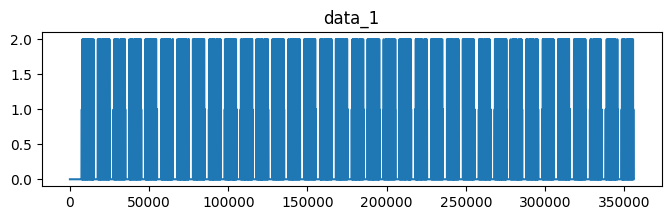

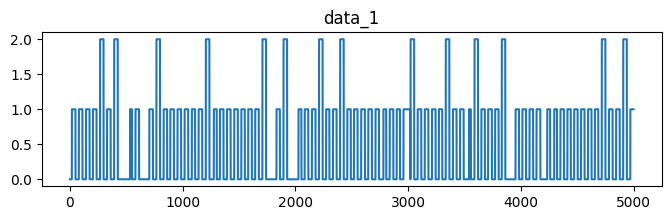

In [15]:
data_1 = [f[0] for f in data['data'][0][0][1]]
print(np.unique(data_1))

plt.figure(figsize=(8,2))
plt.plot(np.squeeze(data_1[:]))
plt.title('data_1')

plt.figure(figsize=(8,2))
plt.plot(np.squeeze(data_1[20000:25000]))
plt.title('data_1')


In [16]:
data_2 = [f[0] for f in data['data'][0][0][1]]
print(np.unique(data_2))

(np.array(data_1) - np.array(data_1)).sum()

[0 1 2]


0

```data[0][0][1] = data[0][0][2]```

In [17]:
display(data['data'][0][0][3][0])
print(len(data['data'][0][0][3][0]))

array([  7482,  17507,  27533,  37557,  47585,  57609,  67634,  77662,
        87685,  97710, 107738, 117761, 127786, 137813, 147837, 157865,
       167888, 177914, 187939, 197966, 207994, 218016, 228044, 238069,
       248095, 258120, 268143, 278165, 288194, 298223, 308255, 318255,
       328282, 338310, 348338])

35


```data['data'][0][0][3]``` - targets onsets

In [18]:
data['data'][0][0][4]

array([[  7482,     31,      7,      1],
       [  7482,     32,      1,      1],
       [  7606,     32,     10,      1],
       ...,
       [355680,     32,      4,      1],
       [355743,     32,     10,      1],
       [355807,     32,      1,      1]])

In [19]:
tar_onsets = np.squeeze(data['data'][0][0][3])
print(tar_onsets)

# Events
events = data['data'][0,0][-1]
print(events)

[  7482  17507  27533  37557  47585  57609  67634  77662  87685  97710
 107738 117761 127786 137813 147837 157865 167888 177914 187939 197966
 207994 218016 228044 238069 248095 258120 268143 278165 288194 298223
 308255 318255 328282 338310 348338]
[[  7482     31      7      1]
 [  7482     32      1      1]
 [  7606     32     10      1]
 ...
 [355680     32      4      1]
 [355743     32     10      1]
 [355807     32      1      1]]


In [20]:
print(np.unique(events[:,1]),
      np.unique(events[:,2]),
      np.unique(events[:,3]),
      sep='\n'
)

[  1  12  14  15  16  17  18  22  23  24  25  26  27  28  29  30  31  32
  33  34  38  55  59  60  61  63  79 105]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[1 2]


In [21]:
print(sum(events[:,3][events[:,3]==1]),
sum(events[:,3][events[:,3]==2])
)

3500 1400


`events[:,0]` - timepoint

`events[:,1]` - ?

`events[:,2]` - n row / col flashed

`events[:,3]` - target (2) / nontarget (1) event


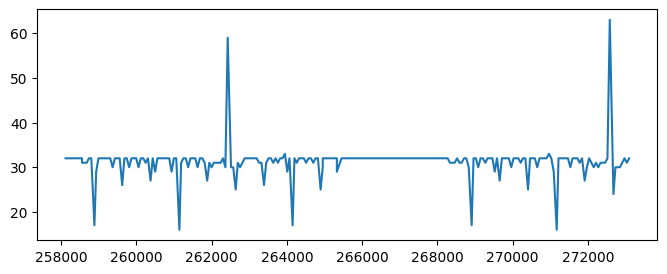

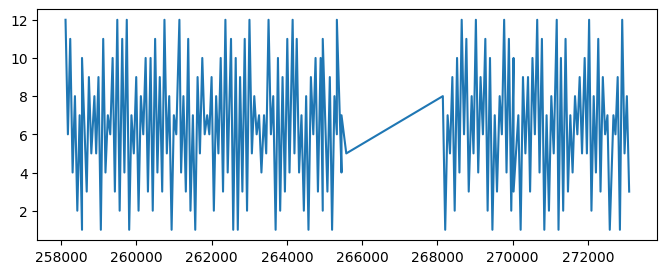

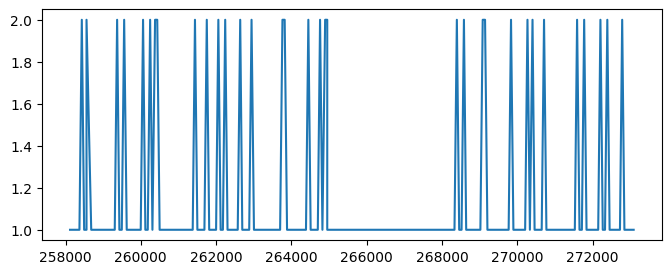

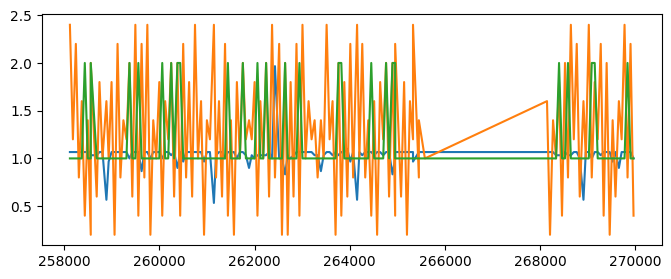

In [22]:
t1, t2 = 3000, 3200

plt.figure(figsize=(8,3))
plt.plot(events[t1:t2,0],events[t1:t2,1])

plt.figure(figsize=(8,3))
plt.plot(events[t1:t2,0],events[t1:t2,2])

plt.figure(figsize=(8,3))
plt.plot(events[t1:t2,0],events[t1:t2,3])

# plt.title(' ')


plt.figure(figsize=(8,3))
plt.plot(events[t1:t2-50,0],events[t1:t2-50,1] / 30)

plt.plot(events[t1:t2-50,0],events[t1:t2-50,2] / 5)

plt.plot(events[t1:t2-50,0],events[t1:t2-50,3])


## Stimuli

(21398, 3)


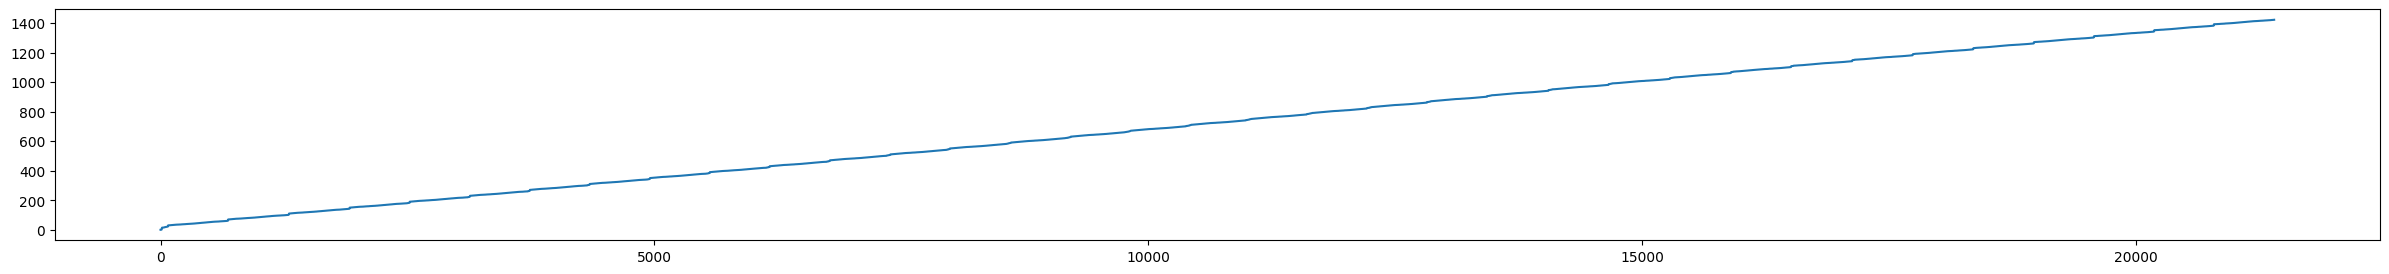

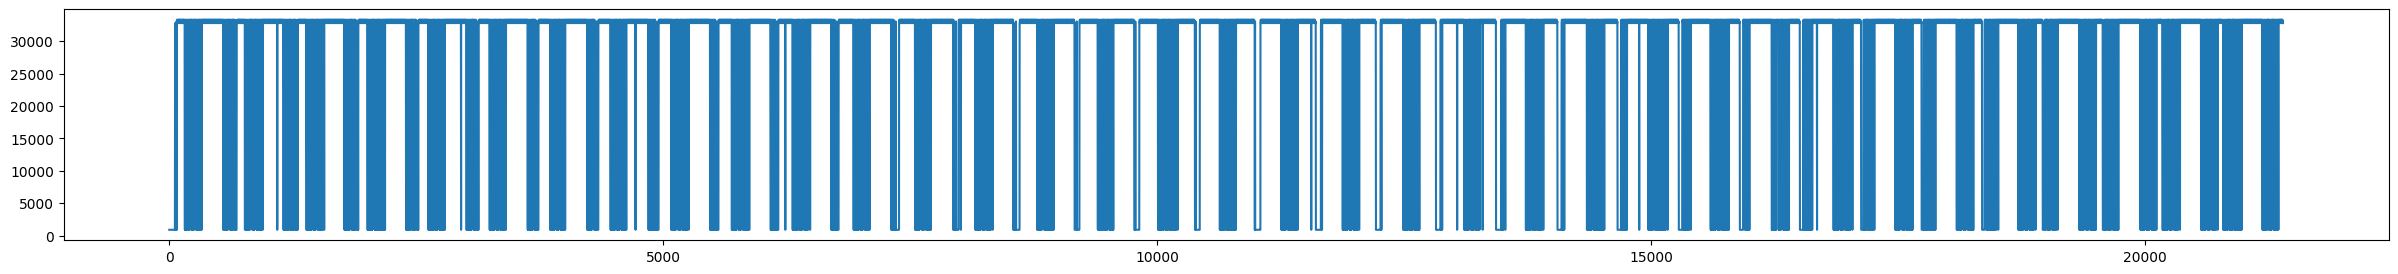

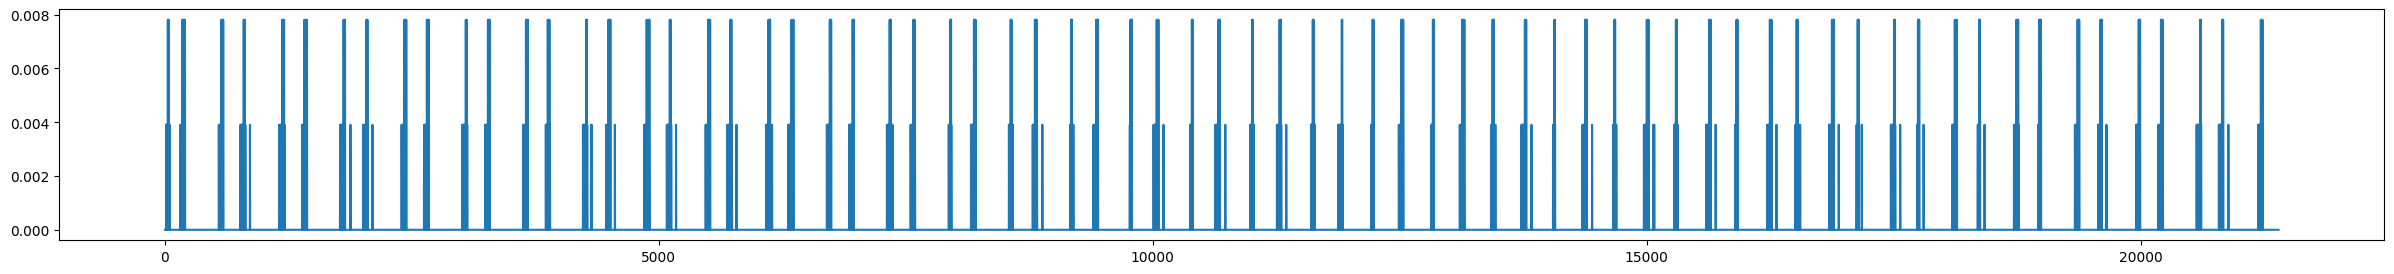

In [23]:
t1 = 0
t2 = -1
print(data['stims'].shape)
plt.figure(figsize=(30,3))
plt.plot(data['stims'][t1:t2,0])

plt.figure(figsize=(30,3))
plt.plot(data['stims'][t1:t2,1])

plt.figure(figsize=(30,3))
plt.plot(data['stims'][t1:t2,2])


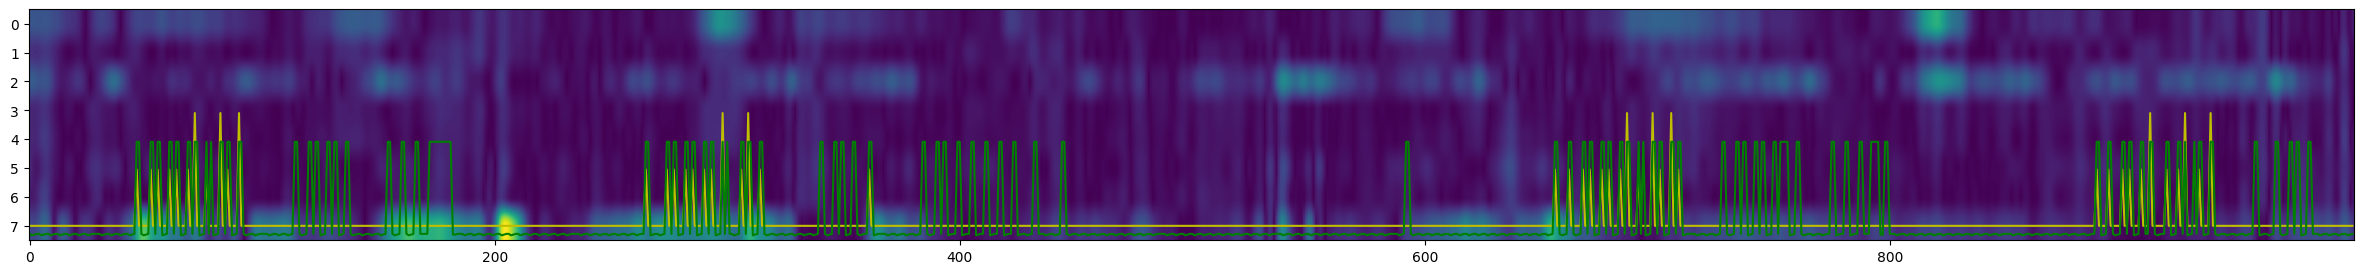

In [24]:
plt.figure(figsize=(30,3))
plt.imshow(abs(eeg[500:1500,:]).T, aspect='auto')
plt.plot(data['stims'][500:1500,2]*(-500)+7, c='y')
plt.plot(data['stims'][500:1500,1]/10000+4, c='g')

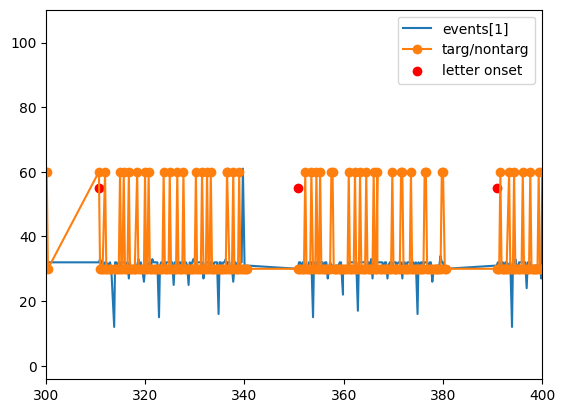

In [25]:
t1, t2 = 300, 400
plt.plot(events[:,0]/fs,events[:,1])
plt.plot(events[:,0]/fs,events[:,-1]*30, '-o')

plt.scatter((tar_onsets/fs), np.repeat(55, len(tar_onsets)), c='red')
plt.xlim(t1, t2)
plt.legend(['events[1]', 'targ/nontarg', 'letter onset'])